# ANN for Housing Data Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

## Dataset Characteristics

#### Number of Instances:
20640

#### Number of Attributes:
8 numeric, predictive attributes and the target

#### Attributes Information:
- MedInc median income in block
- HouseAge median house age in block
- AveRooms average numbers of rooms
- AveBedrooms average numbers of bedrooms
- Population block population
- AveOccup average house occupancy
- Lattitude house block lattitude
- Longitude house block longitude

#### Target
The target variable is the median house value in units of 100,000 for California districts.

#### Documentation
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


### Splitting the data into Train/Validation/Test datasets

- Training Data --- used for training the model.
- Validation Data --- used for tuning the hyperparameters and evaluate the models.
- Test Data --- used to test the model after model has gone through initial vetting by the validation set.

In [5]:
from sklearn.model_selection import train_test_split
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state = 42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state = 42)

### Standardizing the dataset

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
x_train.shape

(11610, 8)

![image](https://miro.medium.com/max/1838/1*Gh5PS4R_A5drl5ebd_gNrg@2x.png)

### Create Neural Network using Sequential Model API

In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = [8]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])

# keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


### Compiling Model

In [11]:
model.compile(loss = "mean_squared_error",
             optimizer = keras.optimizers.SGD(lr = 1e-3),
             metrics = ["mae"])

In [12]:
model_history = model.fit(x_train, y_train, epochs = 20,
                         validation_data = (x_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 853us/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7126 - val_mae: 0.6368
Epoch 2/20
363/363 [==============================] - 0s 569us/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6880 - val_mae: 0.5704
Epoch 3/20
363/363 [==============================] - 0s 569us/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5803 - val_mae: 0.5352
Epoch 4/20
363/363 [==============================] - 0s 585us/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5166 - val_mae: 0.5207
Epoch 5/20
363/363 [==============================] - 0s 571us/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.4895 - val_mae: 0.5022
Epoch 6/20
363/363 [==============================] - 0s 588us/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.4951 - val_mae: 0.4934
Epoch 7/20
363/363 [==============================] - 0s 588us/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4861 - val_mae: 0.4838
Epoch 8/20
363/363 [==============================] - 0s 587us

In [13]:
model_history.history

{'loss': [1.8866397142410278,
  0.6577127575874329,
  0.5934185981750488,
  0.5557191967964172,
  0.5271904468536377,
  0.5032975673675537,
  0.48535558581352234,
  0.47091811895370483,
  0.45779934525489807,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.4260515868663788,
  0.42017653584480286,
  0.41549986600875854,
  0.4111650586128235,
  0.4077068865299225,
  0.4039528965950012,
  0.4004494547843933,
  0.3979603350162506],
 'mae': [0.9900256991386414,
  0.6041510105133057,
  0.5618006587028503,
  0.5398454070091248,
  0.5237293839454651,
  0.5112562775611877,
  0.5010154247283936,
  0.492448091506958,
  0.4857262969017029,
  0.47973746061325073,
  0.4744163453578949,
  0.4703480303287506,
  0.46740880608558655,
  0.46360209584236145,
  0.461266428232193,
  0.4591343402862549,
  0.4568699896335602,
  0.45453646779060364,
  0.4521065056324005,
  0.45083147287368774],
 'val_loss': [0.7126054167747498,
  0.6880087852478027,
  0.5803284645080566,
  0.516608536243

In [14]:
mae_test = model.evaluate(x_test, y_test) 

162/162 [==============================] - 0s 400us/step - loss: 0.3942 - mae: 0.4502


In [15]:
mae_test

[0.39424535632133484, 0.4502214193344116]

As we can see the output the the first value is the loss and the second value is the accuracy.

### Visualization of Accuracy Score with each Epochs

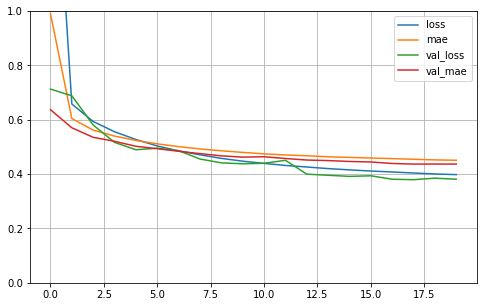

In [16]:
pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

We can notice that this graph is still going down and if we run more epochs the graph will further decrease the losses and increase the accuracy of our model.

If we run for more epochs the model will start from 21st epochs.

### Let's now see how to predict the probabilities and how to predict the classes on new unseen data.

In [17]:
x_new = x_test[:3]

In [18]:
y_pred = model.predict(x_new)

In [19]:
print(y_pred)

[[0.5328768]
 [1.8915398]
 [3.404087 ]]


In [20]:
print(y_test[:3])

[0.477   0.458   5.00001]


## Now, let's create functional API architecture for the same dataset.

As we using the same dataset we need to delete the above sequential model and start new session for functional API.

In [21]:
del model

In [22]:
keras.backend.clear_session()

# Functional API

Not all neural network are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide and Deep neural network connects all or part of the inputs directly to the output layers.

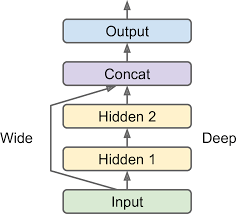

In [23]:
input_ = keras.layers.Input(shape = x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = "relu")(input_)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)

Now let's combine all this layers and create model.

In [24]:
model = keras.models.Model(inputs = [input_], outputs = [output])

In [25]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]         

## Compiling Model

In [26]:
model.compile(loss = "mean_squared_error",
             optimizer = keras.optimizers.SGD(lr = 1e-3),
             metrics = ["mae"])

In [27]:
model_history = model.fit(x_train, y_train, epochs = 40,
                         validation_data = (x_valid, y_valid))

Epoch 1/40
363/363 [==============================] - 0s 783us/step - loss: 1.6920 - mae: 0.8893 - val_loss: 0.8798 - val_mae: 0.6026
Epoch 2/40
363/363 [==============================] - 0s 650us/step - loss: 0.6836 - mae: 0.5994 - val_loss: 0.6420 - val_mae: 0.5764
Epoch 3/40
363/363 [==============================] - 0s 602us/step - loss: 0.6265 - mae: 0.5775 - val_loss: 0.5891 - val_mae: 0.5503
Epoch 4/40
363/363 [==============================] - 0s 598us/step - loss: 0.5877 - mae: 0.5581 - val_loss: 0.5455 - val_mae: 0.5343
Epoch 5/40
363/363 [==============================] - 0s 588us/step - loss: 0.5566 - mae: 0.5421 - val_loss: 0.5409 - val_mae: 0.5202
Epoch 6/40
363/363 [==============================] - 0s 593us/step - loss: 0.5312 - mae: 0.5298 - val_loss: 0.4903 - val_mae: 0.5046
Epoch 7/40
363/363 [==============================] - 0s 585us/step - loss: 0.5108 - mae: 0.5186 - val_loss: 0.4728 - val_mae: 0.4962
Epoch 8/40
363/363 [==============================] - 0s 600us

In [28]:
model_history.history

{'loss': [1.6920058727264404,
  0.6836402416229248,
  0.626488208770752,
  0.5877465605735779,
  0.5565561056137085,
  0.5311981439590454,
  0.5107864141464233,
  0.4951668083667755,
  0.48022276163101196,
  0.4684668779373169,
  0.4589638411998749,
  0.4502205550670624,
  0.4432658851146698,
  0.43632543087005615,
  0.4306245744228363,
  0.4253448247909546,
  0.42129331827163696,
  0.4168177843093872,
  0.4126453101634979,
  0.40958571434020996,
  0.4059634208679199,
  0.40294399857521057,
  0.4000455439090729,
  0.3971884846687317,
  0.3946215510368347,
  0.3924905061721802,
  0.3904934525489807,
  0.38845309615135193,
  0.38671210408210754,
  0.38484567403793335,
  0.382953941822052,
  0.3815852701663971,
  0.3805288076400757,
  0.37870272994041443,
  0.3775632083415985,
  0.3763015866279602,
  0.37508344650268555,
  0.37408941984176636,
  0.3728184998035431,
  0.37164586782455444],
 'mae': [0.8892966508865356,
  0.5993583798408508,
  0.577479362487793,
  0.5581423044204712,
  0.542

In [29]:
mae_test = model.evaluate(x_test, y_test) 

162/162 [==============================] - 0s 376us/step - loss: 0.3685 - mae: 0.4314


In [30]:
mae_test

[0.3684528172016144, 0.431399941444397]

So, when we compare it with MLP(Multilayer perceptron), MLP model is performing well than Wide and Deep Neural model.

### Visualization of Accuracy Score with each Epochs

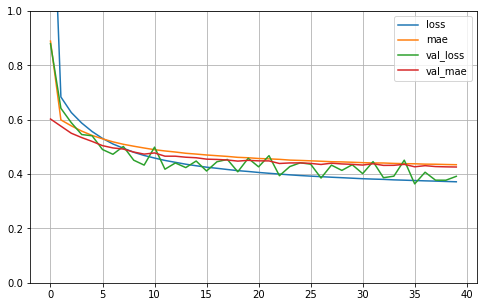

In [31]:
pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

As we can see val_loss and mae is further decreasing, so there is a scope of further improvement in accuracy of the model.

So, we can run for 40 more ecophs to improve the accuracy and performance of the model.